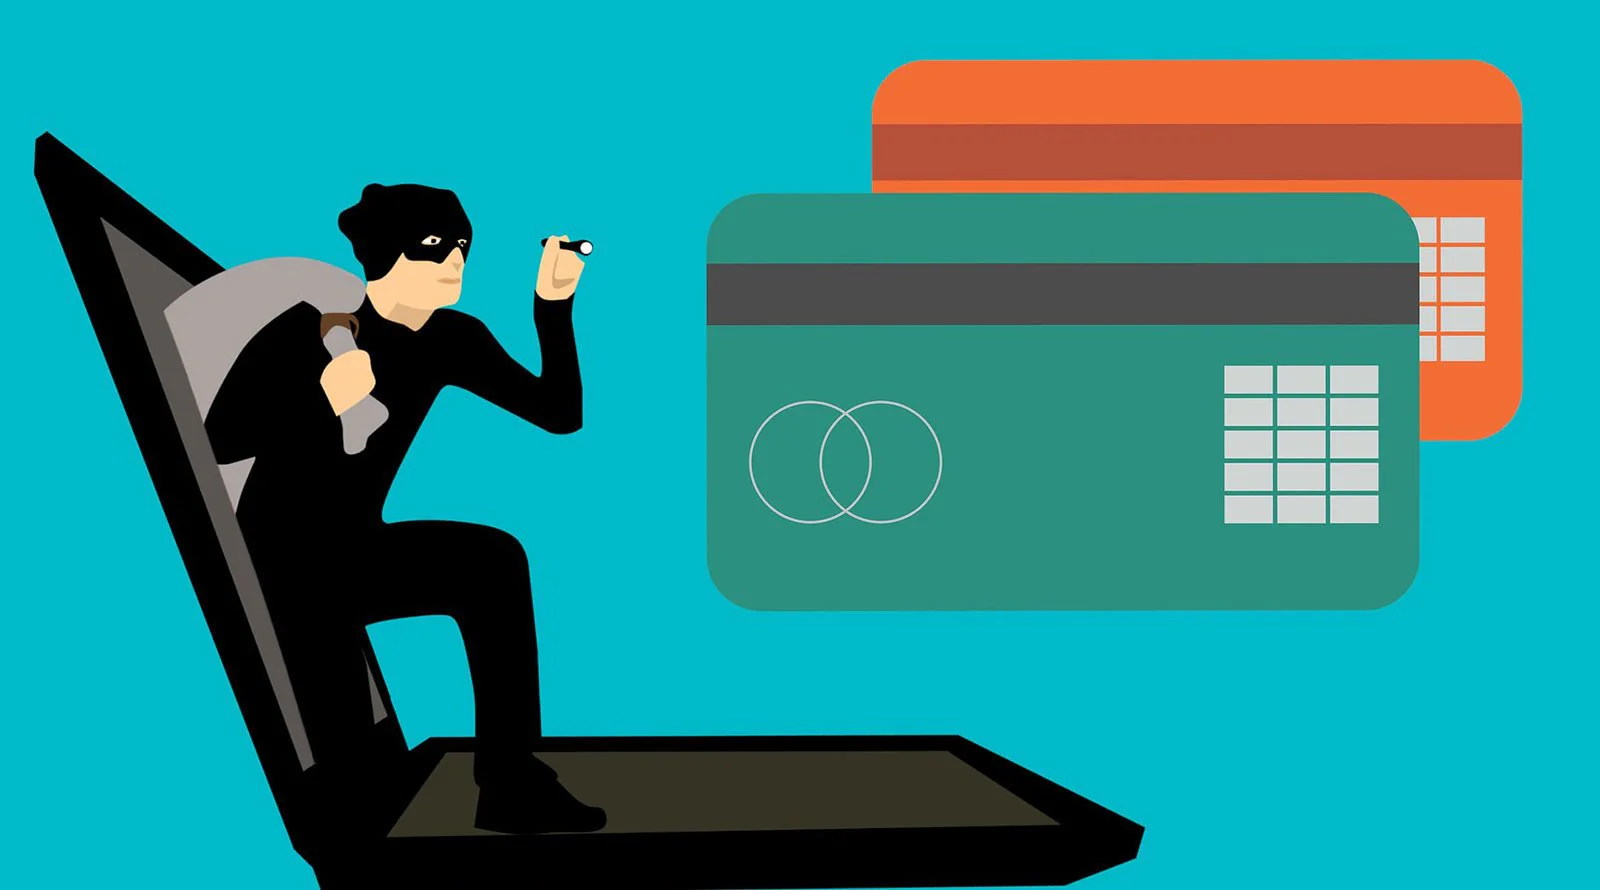

Integrantes:
* Octavio Barrera
* Juan David Venegas
* Alejandro Farelo

In [2]:
!pip install kagglehub


In [3]:
!pip install kagglehub[pandas-datasets]

In [4]:
import kagglehub
iabhishekofficial_creditcard_fraud_detection_path = kagglehub.dataset_download('iabhishekofficial/creditcard-fraud-detection')

print('Data source import complete.')

Using Colab cache for faster access to the 'creditcard-fraud-detection' dataset.
Data source import complete.


In [5]:
import os
import kagglehub

# Define the Kaggle dataset handle
dataset_handle = "iabhishekofficial/creditcard-fraud-detection"

# Download the dataset
downloaded_path = kagglehub.dataset_download(dataset_handle)

print(f"Downloaded dataset to: {downloaded_path}")
print(os.listdir(downloaded_path))

Using Colab cache for faster access to the 'creditcard-fraud-detection' dataset.
Downloaded dataset to: /kaggle/input/creditcard-fraud-detection
['cc_info.csv', 'transactions.csv']


In [6]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os


file_name = "transactions.csv"
downloaded_path = "/kaggle/input/creditcard-fraud-detection"
file_path_Transactions = os.path.join(downloaded_path, file_name)

file_name = "cc_info.csv"
downloaded_path = "/kaggle/input/creditcard-fraud-detection"
file_path_ccInfo = os.path.join(downloaded_path, file_name)


In [7]:
transactions_dataset = pd.read_csv(file_path_Transactions) # Transaction of that credit card
cc_info = pd.read_csv(file_path_ccInfo) # Credit Card Info


In [8]:
import numpy as np
import pandas as pd

# **Preprocesamiento**

In [9]:
# Head Credit Card Info

# ZipCode is a string
# State String
# City String
# CreditCard String
print(cc_info.describe())
print(transactions_dataset.describe())
print(cc_info.info())

cc_info["zipcode"] = cc_info["zipcode"].astype(str)
cc_info["credit_card"] = cc_info["credit_card"].astype(str)
cc_info["city"] = cc_info["city"].astype(str)
cc_info["state"] = cc_info["state"].astype(str)

print(cc_info.count())
print(cc_info.describe())

cc_info.head()


        credit_card       zipcode  credit_card_limit
count  9.840000e+02    984.000000         984.000000
mean   5.410432e+15  17895.316057       12321.138211
std    2.545234e+15  23778.651105        7398.449174
min    1.003715e+15    690.000000        2000.000000
25%    3.316062e+15   3280.000000        7000.000000
50%    5.365218e+15   5820.000000       10000.000000
75%    7.562153e+15  18101.250000       16000.000000
max    9.999757e+15  98401.000000       55000.000000
        credit_card  transaction_dollar_amount           Long            Lat
count  2.945880e+05              294588.000000  294588.000000  294588.000000
mean   5.424562e+15                  86.008036     -76.235238      40.937669
std    2.555803e+15                 124.655954      20.135015       5.391695
min    1.003715e+15                   0.010000    -179.392887     -68.046553
25%    3.344214e+15                  29.970000     -80.209708      40.487726
50%    5.353426e+15                  58.470000     -73.199737

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [10]:
# Transaction Info

# Convertir identificadores a string
transactions_dataset["credit_card"] = transactions_dataset["credit_card"].astype(str)

# Convertir fecha a tipo datetime
transactions_dataset["date"] = pd.to_datetime(transactions_dataset["date"], errors="coerce")

print(transactions_dataset.count())
print(transactions_dataset.describe())

transactions_dataset.head()

credit_card                  294588
date                         294588
transaction_dollar_amount    294588
Long                         294588
Lat                          294588
dtype: int64
                                date  transaction_dollar_amount  \
count                         294588              294588.000000   
mean   2015-09-14 14:26:06.402908416                  86.008036   
min              2015-07-31 09:39:48                   0.010000   
25%    2015-08-22 15:18:50.249999872                  29.970000   
50%       2015-09-13 23:49:47.500000                  58.470000   
75%    2015-10-07 20:36:12.249999872                 100.400000   
max              2015-10-30 10:54:58                 999.970000   
std                              NaN                 124.655954   

                Long            Lat  
count  294588.000000  294588.000000  
mean      -76.235238      40.937669  
min      -179.392887     -68.046553  
25%       -80.209708      40.487726  
50%       -73

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [11]:
# Unir los dos dataset por su identificador (credit_card)
data = pd.merge(
    transactions_dataset,
    cc_info,
    on="credit_card",   # clave de unión
    how="inner"         # "inner" solo une coincidencias
)

print("Shape del dataset unido:", data.shape) ######### SHAPE
print(data.head())

Shape del dataset unido: (294588, 9)
        credit_card                date  transaction_dollar_amount       Long  \
0  1003715054175576 2015-09-11 00:32:40                      43.78 -80.174132   
1  1003715054175576 2015-10-24 22:23:08                     103.15 -80.194240   
2  1003715054175576 2015-10-26 18:19:36                      48.55 -80.211033   
3  1003715054175576 2015-10-22 19:41:10                     136.18 -80.174138   
4  1003715054175576 2015-10-26 20:08:22                      71.82 -80.238720   

         Lat     city state zipcode  credit_card_limit  
0  40.267370  Houston    PA   15342              20000  
1  40.180114  Houston    PA   15342              20000  
2  40.313004  Houston    PA   15342              20000  
3  40.290895  Houston    PA   15342              20000  
4  40.166719  Houston    PA   15342              20000  


# **Limpieza**

In [12]:
# Limpieza de datos

# Verificar nulos por columna
print(data.isnull().sum())

#Verfica NA/NAN
print(data.isna().sum())



credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64
credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64


In [13]:
# Verificar duplicados exactos
print(f"Duplicados exactos: {data.duplicated().sum()}")

# Verificar duplicados en transacciones (misma tarjeta, misma fecha, mismo monto)
print(f"Transacciones duplicadas: {data.duplicated(subset=['credit_card', 'date', 'transaction_dollar_amount']).sum()}")

Duplicados exactos: 0
Transacciones duplicadas: 0


In [14]:
# Verificar inconsistencias geograficas por tarjeta
geo_inconsistencies = data.groupby('credit_card').agg({
    'city': 'nunique',
    'state': 'nunique',
    'zipcode': 'nunique'
}).sum()
print(geo_inconsistencies.head())
# En promedio cada targeta tiene 1 ciudad, 1 estado y 1 zipcode

city       984
state      984
zipcode    984
dtype: int64


In [15]:
print(f"Transacciones con monto <= 0: {len(data[data['transaction_dollar_amount'] <= 0])}")

Transacciones con monto <= 0: 0


In [16]:
# Verificar rango de fechas
print(f"Fecha mínima: {data['date'].min()}")
print(f"Fecha máxima: {data['date'].max()}")

Fecha mínima: 2015-07-31 09:39:48
Fecha máxima: 2015-10-30 10:54:58


# **Graficas**

In [17]:
data.describe()

,date,transaction_dollar_amount,Long,Lat,credit_card_limit
count,294588,294588.000000,294588.000000,294588.000000,294588.000000
mean,2015-09-14 14:26:06.402908416,86.008036,-76.235238,40.937669,15502.053716
min,2015-07-31 09:39:48,0.010000,-179.392887,-68.046553,2000.000000
25%,2015-08-22 15:18:50.249999872,29.970000,-80.209708,40.487726,10000.000000
50%,2015-09-13 23:49:47.500000,58.470000,-73.199737,42.403066,15000.000000
75%,2015-10-07 20:36:12.249999872,100.400000,-72.091933,43.180015,20000.000000
max,2015-10-30 10:54:58,999.970000,179.917513,78.914330,55000.000000
std,NaN,124.655954,20.135015,5.391695,7956.291556


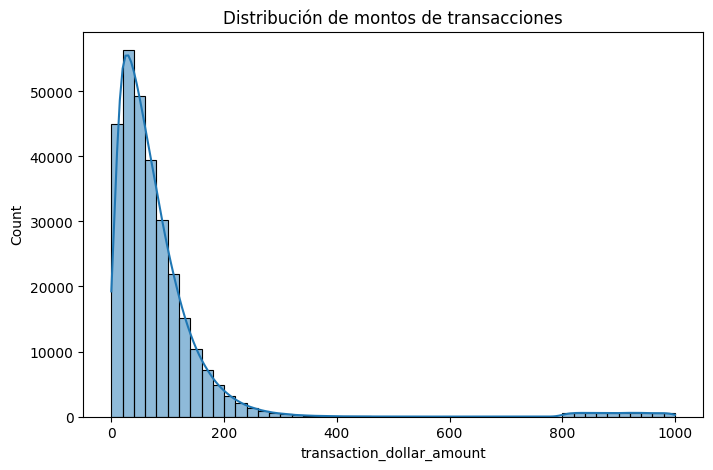

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data["transaction_dollar_amount"], bins=50, kde=True)
plt.title("Distribución de montos de transacciones")
plt.show()


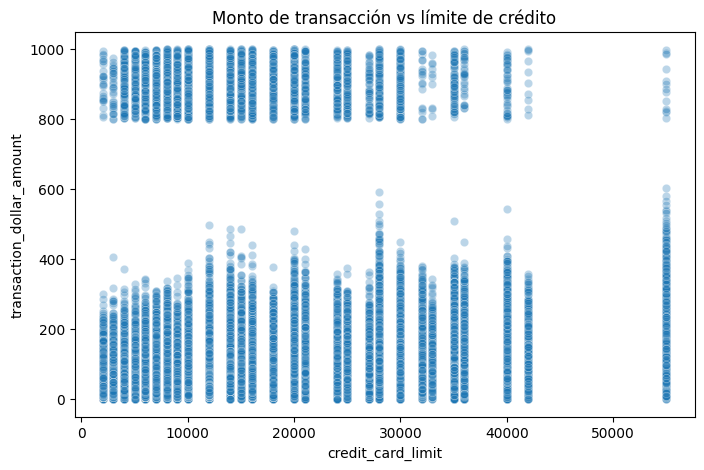

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data,
    x="credit_card_limit",
    y="transaction_dollar_amount",
    alpha=0.3
)
plt.title("Monto de transacción vs límite de crédito")
plt.show()


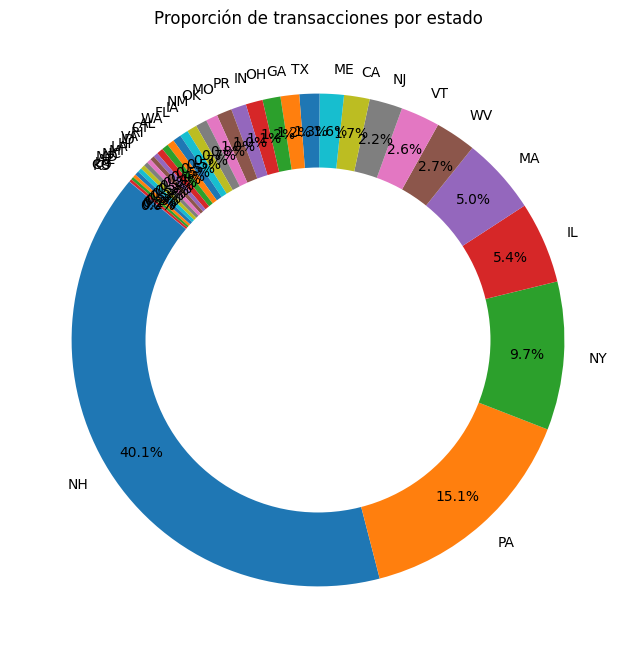

In [20]:
import matplotlib.pyplot as plt

# Contar transacciones por estado
state_counts = data["state"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    state_counts,
    labels=state_counts.index,
    autopct="%1.1f%%",    # porcentajes
    startangle=140,       # ángulo inicial
    pctdistance=0.85      # para separar un poco el % del centro
)

# Hacer el gráfico tipo "dona"
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proporción de transacciones por estado")
plt.show()


Número total de tarjetas únicas: 984

Estadísticas de transacciones por tarjeta:
Máximo: 667
Mínimo: 1
Promedio: 299.38
Mediana: 284.5

Percentiles:
25%: 136.75
50%: 284.5
75%: 459.25
90%: 558.7
95%: 587.0
99%: 626.6799999999998

Distribucion por cantidad de transacciones:
1 transaccion: 3 tarjetas
2-5 transacciones: 9 tarjetas
6-20 transacciones: 25 tarjetas
Más de 20 transacciones: 947 tarjetas


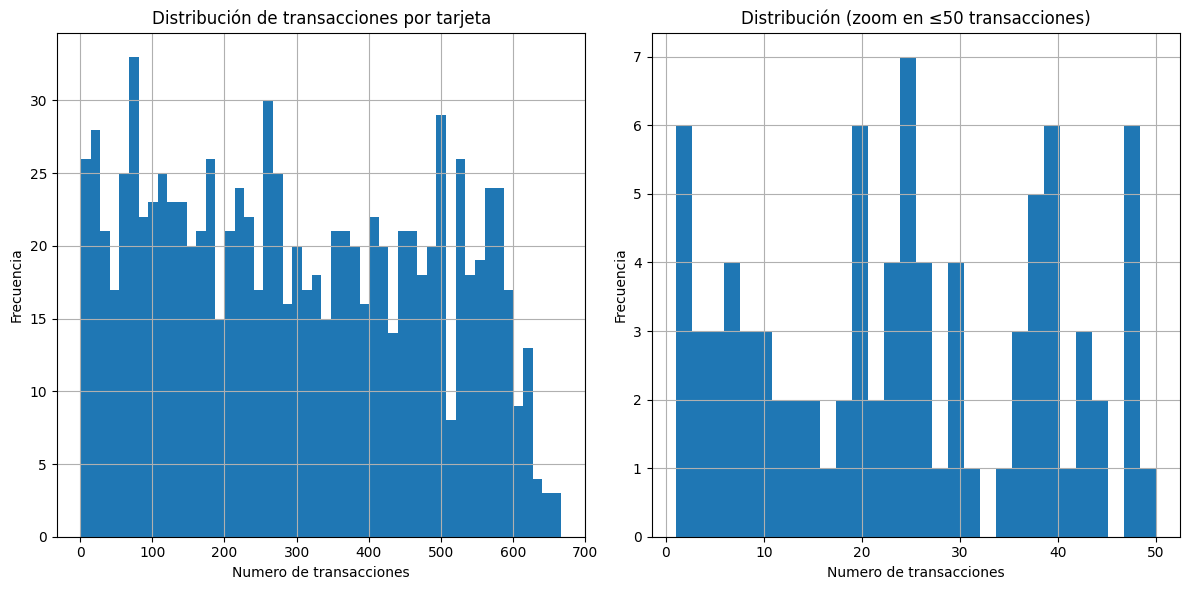

In [21]:
# Contar el número de tarjetas únicas
num_unique_cards = data['credit_card'].nunique()
print(f"Número total de tarjetas únicas: {num_unique_cards}")

# Ver la distribución de transacciones por tarjeta
transactions_per_card = data['credit_card'].value_counts()

# Estadísticas descriptivas de esta distribución
print("\nEstadísticas de transacciones por tarjeta:")
print(f"Máximo: {transactions_per_card.max()}")
print(f"Mínimo: {transactions_per_card.min()}")
print(f"Promedio: {transactions_per_card.mean():.2f}")
print(f"Mediana: {transactions_per_card.median()}")

# Mostrar percentiles
print("\nPercentiles:")
print(f"25%: {transactions_per_card.quantile(0.25)}")
print(f"50%: {transactions_per_card.quantile(0.50)}")  # Mediana
print(f"75%: {transactions_per_card.quantile(0.75)}")
print(f"90%: {transactions_per_card.quantile(0.90)}")
print(f"95%: {transactions_per_card.quantile(0.95)}")
print(f"99%: {transactions_per_card.quantile(0.99)}")

# Contar tarjetas con diferentes rangos de transacciones
print("\nDistribucion por cantidad de transacciones:")
print(f"1 transaccion: {(transactions_per_card == 1).sum()} tarjetas")
print(f"2-5 transacciones: {((transactions_per_card >= 2) & (transactions_per_card <= 5)).sum()} tarjetas")
print(f"6-20 transacciones: {((transactions_per_card >= 6) & (transactions_per_card <= 20)).sum()} tarjetas")
print(f"Más de 20 transacciones: {(transactions_per_card > 20).sum()} tarjetas")

# También puedes visualizar la distribución
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
transactions_per_card.hist(bins=50)
plt.title('Distribución de transacciones por tarjeta')
plt.xlabel('Numero de transacciones')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
transactions_per_card[transactions_per_card <= 50].hist(bins=30)  # Zoom en el rango más común
plt.title('Distribución (zoom en ≤50 transacciones)')
plt.xlabel('Numero de transacciones')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **New Columns with PCA**

What is PCA?

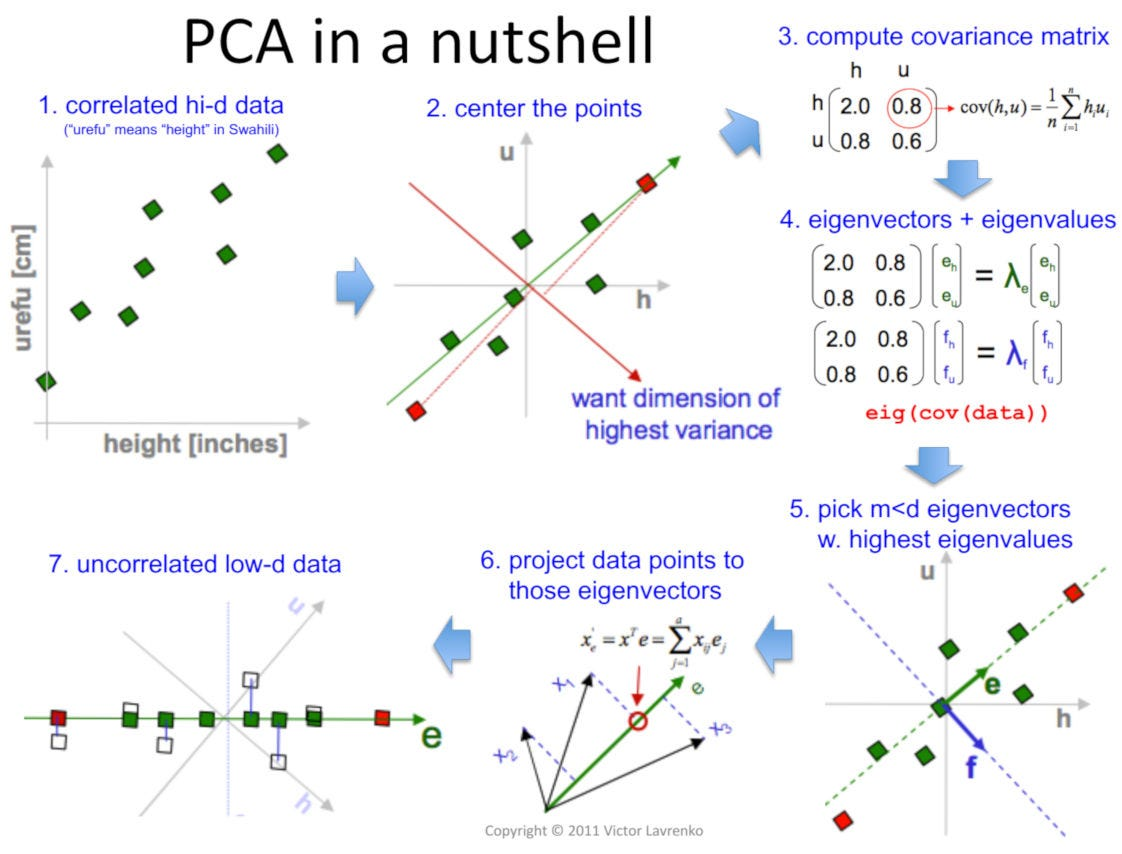

In [22]:
import kagglehub
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

print('Data source import complete.')

import os
import kagglehub

# Define the Kaggle dataset handle
dataset_handle = "mlg-ulb/creditcardfraud"

# Download the dataset
downloaded_path = kagglehub.dataset_download(dataset_handle)

print(f"Downloaded dataset to: {downloaded_path}")
print(os.listdir(downloaded_path))

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Data source import complete.
Using Colab cache for faster access to the 'creditcardfraud' dataset.
Downloaded dataset to: /kaggle/input/creditcardfraud
['creditcard.csv']


In [23]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os


file_name = "creditcard.csv"
downloaded_path = "/kaggle/input/creditcardfraud"
creditcarddata = os.path.join(downloaded_path, file_name)

dataset = pd.read_csv(creditcarddata) # Credit Card Info


In [24]:
print("Credit Card Fraud Detection data -  rows:",dataset.shape[0]," columns:", dataset.shape[1])

total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Credit Card Fraud Detection data -  rows: 284807  columns: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Correlation between the PCA columns

<Axes: >

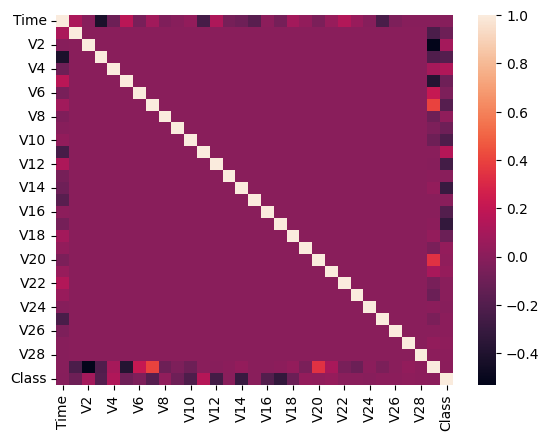

In [27]:
sns.heatmap(dataset.corr(),cbar = True)

For feature selection, we will exclude the features having correlation values between [-0.1,0.1].

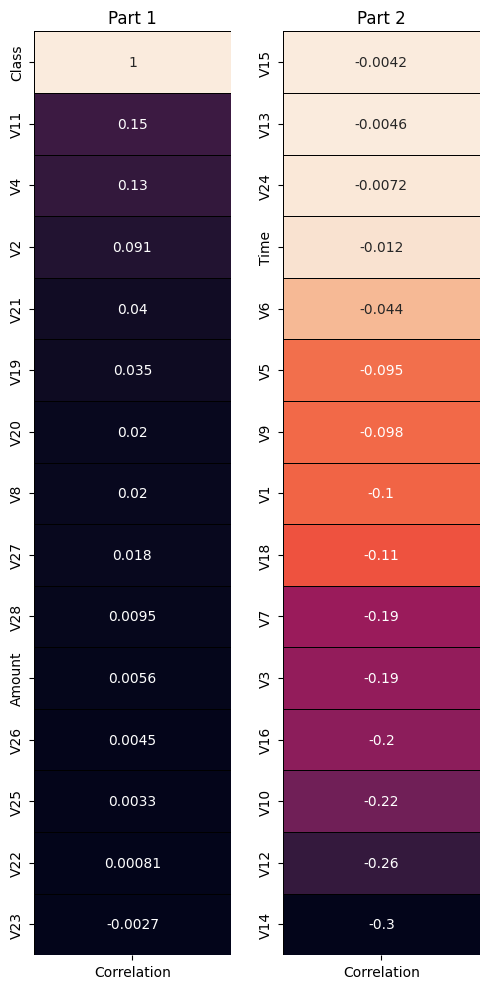

In [28]:
corr = dataset.corrwith(dataset['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

In [29]:
df1 = dataset[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


# Data Balancing

Options in Data Balancing

Undersampling : Trim down the majority samples of the target variable.

Oversampling : Increase the minority samples of the target variable to the majority samples.

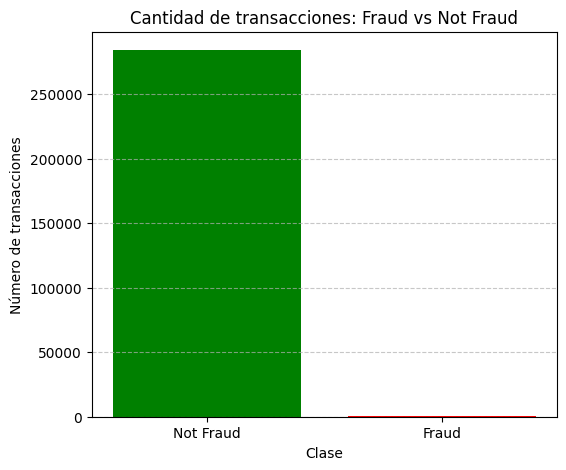

In [30]:
import matplotlib.pyplot as plt

# Contar cuántos hay en cada clase
counts = dataset['Class'].value_counts()

# Graficar
plt.figure(figsize=(6,5))
plt.bar(['Not Fraud', 'Fraud'], counts, color=['green', 'red'])
plt.title('Cantidad de transacciones: Fraud vs Not Fraud')
plt.ylabel('Número de transacciones')
plt.xlabel('Clase')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [32]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
X = df1.iloc[:,:9].values
y = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
Counter(y)

Counter({np.int64(0): 4920, np.int64(1): 2460})

Utilizamos una técnica de sobremuestreo (OverSampling) mediante SMOTE (Synthetic Minority Over-sampling Technique), junto con un submuestreo aleatorio (RandomUnderSampler) que selecciona muestras sin reemplazo.

Primero reducimos el tamaño del conjunto de datos aplicando el submuestreo para equilibrar parcialmente las clases, y luego empleamos el sobremuestreo para aumentar la cantidad de ejemplos de la clase minoritaria (fraudes).

Después del submuestreo, la clase mayoritaria (transacciones no fraudulentas) quedó con 4,920 muestras, mientras que la clase minoritaria (fraudes) tuvo 492 muestras.

Posteriormente, tras aplicar SMOTE, la clase mayoritaria se mantuvo con 4,920 muestras y la clase minoritaria aumentó a 2,460 muestras, generando muestras sintéticas que imitan las características de los casos de fraude reales.

# **Dataset para entrenamiento**

In [33]:
print(X[:5])
print(y[:5])
print("Unique Y",np.unique(y))

[[-0.93292941 -0.42323751 -0.70013696 -0.16392802 -0.42349033  0.28149907
   0.03251081  0.15064745 -0.48518241]
 [ 2.59674887  1.23863686  0.37820128 -0.86555886  0.51178004 -1.93720684
   0.73791255 -1.2326261   1.26459717]
 [ 0.22364499 -0.42244046  0.89552226 -0.86489601  0.98590929  0.03935564
  -0.52614875  0.26458916  0.44834768]
 [ 0.21735023 -2.95268584  0.07085338  1.02236198  0.35784167 -0.31392936
  -0.04836716 -0.18582929 -0.26628694]
 [-0.15543076 -0.53099312  0.08329614 -0.04618327  0.78493268  0.54563452
   0.55027689  0.72469628 -0.74602802]]
[0 0 0 0 0]
Unique Y [0 1]


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)


# DecisionTreeClassifier

max_depth = 10 -> mean accuracy = 0.9600 std = 0.0074
max_depth = 15 -> mean accuracy = 0.9624 std = 0.0062
max_depth = 20 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 25 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 30 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 35 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 40 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 45 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 50 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 55 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 60 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 65 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 70 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 75 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 80 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 85 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 90 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 95 -> mean accuracy = 0.9621 std = 0.0066
max_depth = 100 -> mean accu

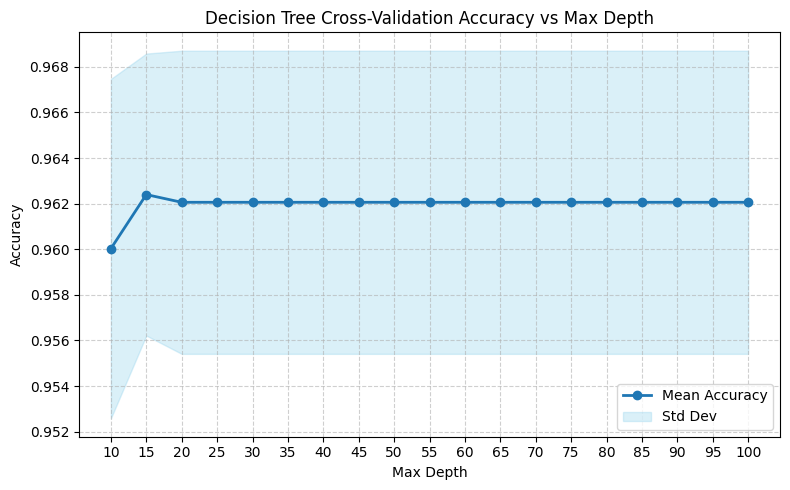

In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score


# range of depths to test
depths = range(10, 101, 5)   # 10, 20, 30, ..., 100

mean_scores = []
std_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=21)
    # cross-validation with 5 folds
    scores = cross_val_score(model, x_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=21), scoring=make_scorer(accuracy_score))
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    print(f"max_depth = {d} -> mean accuracy = {scores.mean():.4f} std = {scores.std():.4f}")

# find best depth
best_depth = depths[np.argmax(mean_scores)]
best_score = max(mean_scores)

print("\nBest max_depth:", best_depth)
print("Best cross-val accuracy:", round(best_score, 4))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(depths, mean_scores, marker='o', label='Mean Accuracy', linewidth=2)
plt.fill_between(depths,
                 np.array(mean_scores) - np.array(std_scores),
                 np.array(mean_scores) + np.array(std_scores),
                 color='skyblue', alpha=0.3, label='Std Dev')

plt.title("Decision Tree Cross-Validation Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(depths)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# RandomForest sin Parametros


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

model = RandomForestClassifier(

)

cv = KFold(n_splits=5, shuffle=True, random_state=21)

scores = cross_val_score(
    model,
    x_train, y_train,
    cv=cv,
    scoring=make_scorer(accuracy_score)
)

print("Cross-validation accuracies:", scores)
print(f"\nMean accuracy = {scores.mean():.4f}")
print(f"Standard deviation = {scores.std():.4f}")


Cross-validation accuracies: [0.97967824 0.97375106 0.97798476 0.98137172 0.97711864]

Mean accuracy = 0.9780
Standard deviation = 0.0026


# RandomForest

max_depth = 10 -> mean accuracy = 0.9705 std = 0.0030
max_depth = 20 -> mean accuracy = 0.9773 std = 0.0031
max_depth = 30 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 40 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 50 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 60 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 70 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 80 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 90 -> mean accuracy = 0.9775 std = 0.0032
max_depth = 100 -> mean accuracy = 0.9775 std = 0.0032

Best max_depth: 30
Best cross-val accuracy: 0.9775


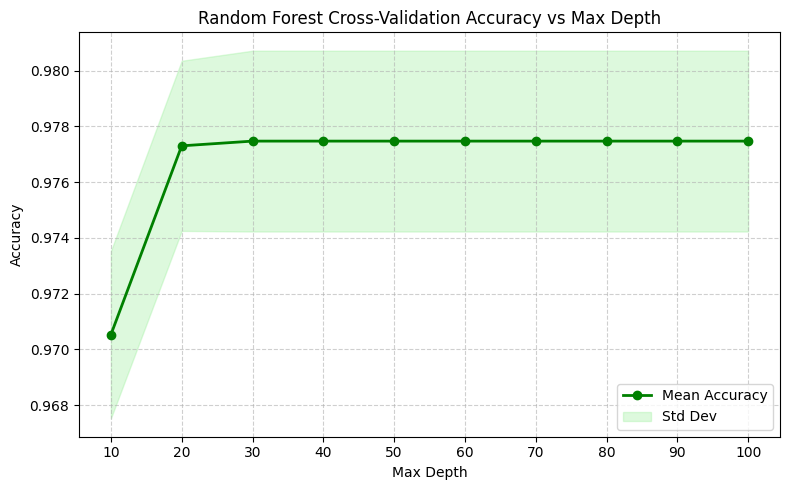

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# rango de profundidades a probar
depths = range(10, 101, 10)  # 10, 20, 30, ..., 100

mean_scores = []
std_scores = []

for d in depths:
    model = RandomForestClassifier(max_depth=d, n_estimators=100, random_state=21)
    # validación cruzada con 5 particiones
    scores = cross_val_score(
        model,
        x_train, y_train,
        cv=KFold(n_splits=5, shuffle=True, random_state=21),
        scoring=make_scorer(accuracy_score)
    )
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    print(f"max_depth = {d} -> mean accuracy = {scores.mean():.4f} std = {scores.std():.4f}")

# encontrar mejor profundidad
best_depth = depths[np.argmax(mean_scores)]
best_score = max(mean_scores)

print("\nBest max_depth:", best_depth)
print("Best cross-val accuracy:", round(best_score, 4))

# --- Graficar los resultados ---
plt.figure(figsize=(8, 5))
plt.plot(depths, mean_scores, marker='o', color='green', linewidth=2, label='Mean Accuracy')
plt.fill_between(
    depths,
    np.array(mean_scores) - np.array(std_scores),
    np.array(mean_scores) + np.array(std_scores),
    color='lightgreen', alpha=0.3, label='Std Dev'
)

plt.title("Random Forest Cross-Validation Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks(depths)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# SVC: Kernel (CROSSVALIDATION)


kernel = linear -> mean accuracy = 0.9492 std = 0.0047
kernel = poly -> mean accuracy = 0.9433 std = 0.0041
kernel = rbf -> mean accuracy = 0.9499 std = 0.0049
kernel = sigmoid -> mean accuracy = 0.8880 std = 0.0110

Best kernel: rbf
Best cross-val accuracy: 0.9499


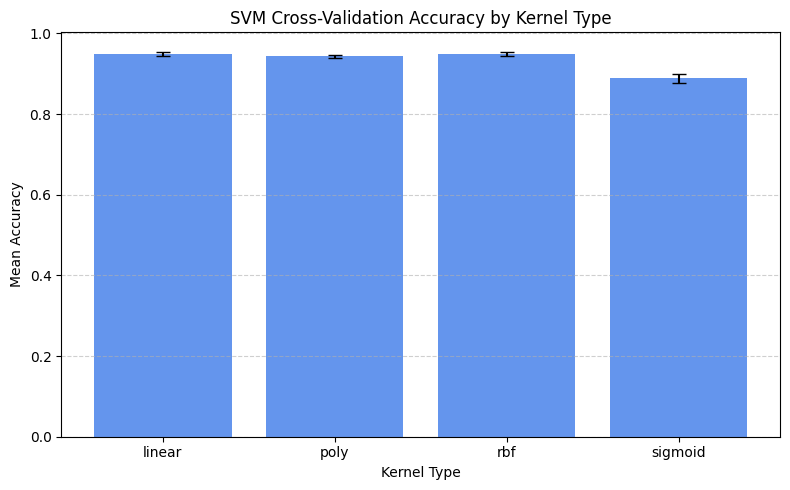

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score

# kernels a comparar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

mean_scores = []
std_scores = []

for k in kernels:
    model = SVC(kernel=k, random_state=21)

    # validación cruzada con 5 folds
    scores = cross_val_score(
        model,
        x_train, y_train,
        cv=KFold(n_splits=5, shuffle=True, random_state=21),
        scoring=make_scorer(accuracy_score)
    )

    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    print(f"kernel = {k} -> mean accuracy = {scores.mean():.4f} std = {scores.std():.4f}")

# encontrar el mejor kernel
best_kernel = kernels[np.argmax(mean_scores)]
best_score = max(mean_scores)

print("\nBest kernel:", best_kernel)
print("Best cross-val accuracy:", round(best_score, 4))

# --- Graficar resultados ---
plt.figure(figsize=(8, 5))
plt.bar(kernels, mean_scores, yerr=std_scores, color='cornflowerblue', capsize=5)
plt.title("SVM Cross-Validation Accuracy by Kernel Type")
plt.xlabel("Kernel Type")
plt.ylabel("Mean Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [39]:
np.unique(y_train)

array([0, 1])

In [40]:
import tensorflow as tf
import numpy as np

N_features = x_train.shape[1]
model_one = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(N_features,)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])
model_one.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Entrenamiento
history = model_one.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Predicciones
y_pred = (model_one.predict(x_test) > 0.5).astype("int32")

# Métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9158 - loss: 0.4216 - val_accuracy: 0.9450 - val_loss: 0.2249
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9468 - loss: 0.2074 - val_accuracy: 0.9517 - val_loss: 0.1671
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1687 - val_accuracy: 0.9500 - val_loss: 0.1475
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9522 - loss: 0.1537 - val_accuracy: 0.9526 - val_loss: 0.1388
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9514 - loss: 0.1399 - val_accuracy: 0.9551 - val_loss: 0.1344
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1301 - val_accuracy: 0.9551 - val_loss: 0.1319
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9551 - loss: 0.1278 - val_accuracy: 0.9551 - val_loss: 0.1296
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9525 - loss: 0.1370 - val_accuracy: 0.

In [42]:
import tensorflow as tf
import numpy as np

N_features = x_train.shape[1]
model_two = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(N_features,)),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')

])
model_two.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# Entrenamiento
history = model_two.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Predicciones
y_pred = (model_two.predict(x_test) > 0.5).astype("int32")

# Métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7968 - loss: 0.4914 - val_accuracy: 0.9382 - val_loss: 0.2657
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9453 - loss: 0.2312 - val_accuracy: 0.9467 - val_loss: 0.1778
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9485 - loss: 0.1740 - val_accuracy: 0.9475 - val_loss: 0.1516
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9465 - loss: 0.1575 - val_accuracy: 0.9483 - val_loss: 0.1415
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9505 - loss: 0.1402 - val_accuracy: 0.9467 - val_loss: 0.1353
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9490 - loss: 0.1380 - val_accuracy: 0.9500 - val_loss: 0.1320
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9544 - loss: 0.1252 - val_accuracy: 0.9526 - val_loss: 0.1295
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9564 - loss: 0.1241 - val_accuracy: 0.

In [44]:
import tensorflow as tf
import numpy as np

N_features = x_train.shape[1]
model_three = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(N_features,)),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')

])
model_three.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
# Entrenamiento
history = model_three.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Predicciones
y_pred = (model_three.predict(x_test) > 0.5).astype("int32")

# Métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7410 - loss: 0.5026 - val_accuracy: 0.9441 - val_loss: 0.2703
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9457 - loss: 0.2407 - val_accuracy: 0.9492 - val_loss: 0.1828
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9517 - loss: 0.1771 - val_accuracy: 0.9492 - val_loss: 0.1549
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9457 - loss: 0.1629 - val_accuracy: 0.9500 - val_loss: 0.1442
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9478 - loss: 0.1532 - val_accuracy: 0.9509 - val_loss: 0.1383
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9529 - loss: 0.1437 - val_accuracy: 0.9492 - val_loss: 0.1350
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9559 - loss: 0.1272 - val_accuracy: 0.9517 - val_loss: 0.1328
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9527 - loss: 0.1428 - val_accuracy: 0.